In [2]:
from HC_Lattice import HCLattice
n_sites = [3, 3]
pbc = False
static_charges = None # {(0,0):1, (1, 2):-1}
HCL = HCLattice(n_sites=n_sites, ptbc=pbc) # HyperCubeLattice

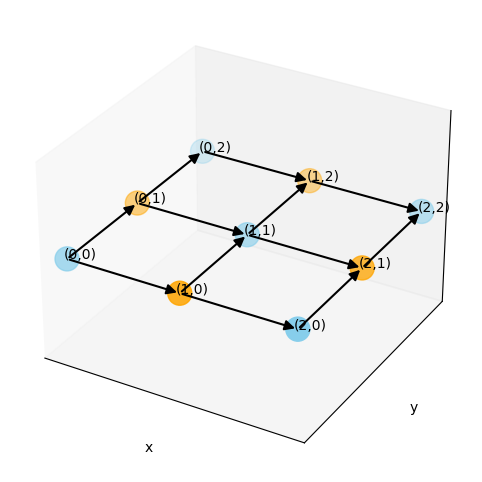

In [3]:
HCL.draw_graph_func(gauss_law_fig=False,static_charges=static_charges)

In [33]:
from Hamiltonian_QED_sym import HamiltonianQED_sym
from Hamiltonian_QED_oprt import HamiltonianQED_oprt
config = {
    'latt': HCL,
    'n_sites': n_sites,
    'pbc': pbc,
    'puregauge': True,
    'static_charges_values': static_charges,
    'e_op_out_plus': False,
    'magnetic_basis': True,
    'encoding': 'ed',
    'l': 2,
    'L': 8,
}
HS = HamiltonianQED_sym(config, display_hamiltonian=False) # Hamiltonian(as)Symbols
HO = HamiltonianQED_oprt(config, HS, sparse_pauli=True) # Hamiltonian(as)Operators

HamiltonianQED_sym: Initializing...
> Gauss law equations solved
> e_op_free and u_op_free built
Magnetic basis used for electric H
>> Gauss law applied and Hamiltonian built.  Execution time: 0.011044979095458984 seconds
HamiltonianQED_oprt: Initializing...
> e_op_free and u_op_free built
> Pauli strings built
Hamiltonian_el_pauli done
Hamiltonian B mag basis: done
>> Hamiltonian built.  Execution time: 1.1179218292236328 seconds
>> Suppression term built.  Execution time: 0.0002827644348144531 seconds


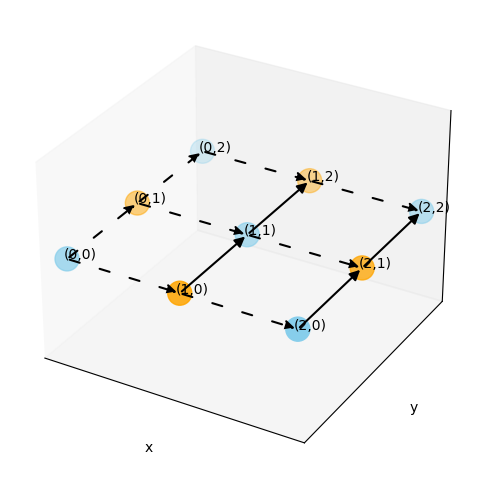

In [24]:
HCL.draw_graph_func(gauss_law_fig=True, e_op_free=HO.e_op_free, static_charges=static_charges)

In [34]:
import primme
import scipy as sp

# Hamiltonian(as)Pauli(matricies)
HP = HO.get_hamiltonian(g_var=0.5, m_var=3, omega=1, fact_b_op=1, fact_e_op=1, lambd=1e3)

# Compressed Sparse Row HP: faster computation
scrHP = sp.sparse.csr_matrix(HP)

# Eigenwerte, Eigenbasis
EW, EB = primme.eigsh(scrHP, k=3, which='SA')

idx = EW.argsort()
EW = EW[idx]
EB = EB[:, idx]